In [1]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
mpl.rcParams['axes.titlesize']=13
style = {'axes.facecolor': 'whitesmoke','axes.grid':True}

***
***

# 2.1 Actividad 1

***
>***Generar una señal sinusoidal 2D muestreada. Mostrarla como superficie y como imagen (con la escala de colores correspondiente).***
***

***Primero la muestro como malla y como superficie...***

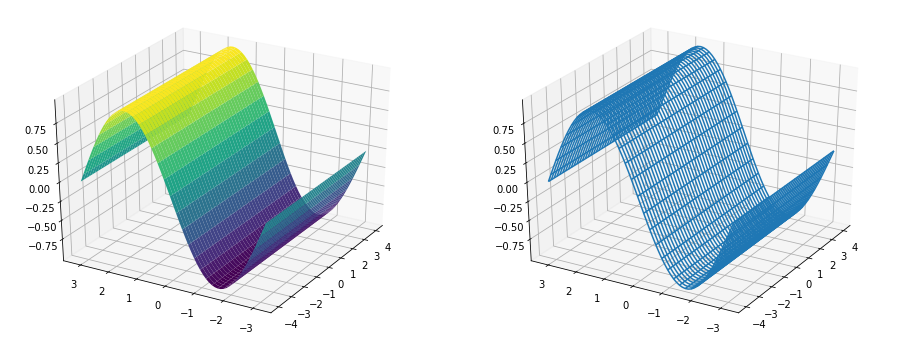

In [2]:
# Armo los vectores/matrices...
step = 0.1
x = np.arange(-4, 4 + step, step)
y = np.arange(-np.pi, np.pi + step, step)
X, Y = np.meshgrid(x, y)
Z = np.sin(Y)

## Con doble for sería...
# Z = np.empty_like(X)
# for i in range(len(y)):
#     for j in range(len(x)):
#         Z[i,j] = np.sin(y[i])

# Grafico...
fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection':'3d', 'azim':-150},
                       gridspec_kw={'wspace':0.1})
ax[0].plot_surface(X, Y, Z, cmap='viridis')
ax[1].plot_wireframe(X, Y, Z);

***Como imagen, en escala de grises y con el mapa de color de la superficie usada previamente...***

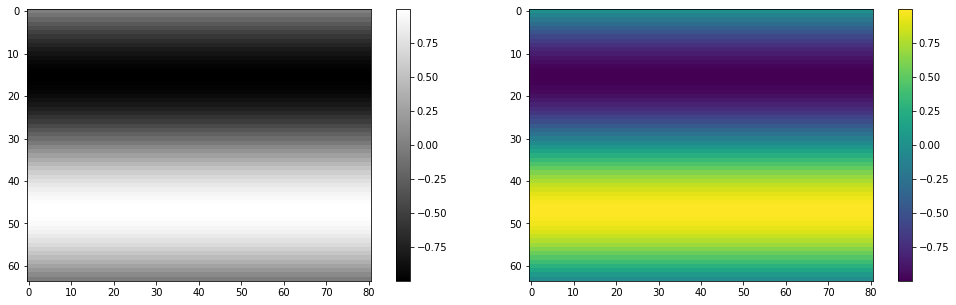

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), gridspec_kw={'wspace':0})
for axx, cmap in zip(ax, ['gray','viridis']):
    cb = axx.imshow(Z, cmap=cmap)
    fig.colorbar(cb, ax=axx)

***
***
# 2.1 Actividad 2

***
>***Generar una imagen digital con 20 niveles que represente a la función:***
$$
f(x,y)=20e^{- \pi \frac{(x- 128)^2+(y-128)^2}{128}} \quad \quad x,y \in [0,256]
$$
>
>***Luego, representar la función de cuantización y del error de cuantización.***
***

***Primero calculo la función en ese dominio y la grafico como imagen...***

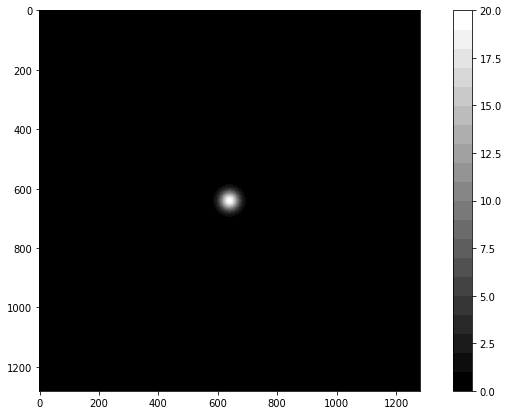

In [4]:
# Armo vectores...
step = 0.2
x = np.arange(0, 256 + step, step)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128)

# Grafico como imagen con 20 niveles..
n = 20
mi_cmap = mpl.cm.get_cmap('gray', n)
fig, ax = plt.subplots(1, figsize=(12,7))
cb = ax.imshow(Z, cmap=mi_cmap);
fig.colorbar(cb, ax=ax);

***Represento a función de cuantización y su error...***

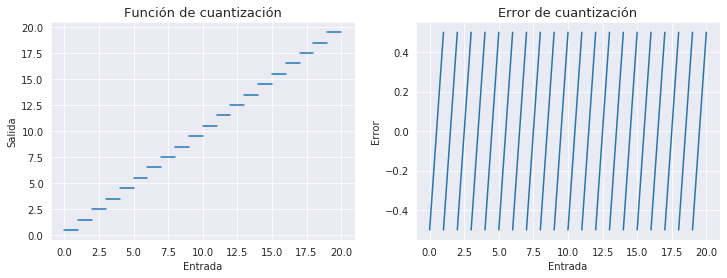

In [5]:
# Armo niveles..
step = (np.max(Z) - np.min(Z))/n
hstep = step/2
lev = np.linspace(np.min(Z) + hstep, np.max(Z) - hstep, n)

# Grafico..
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    for l in lev:
        stt, stp = l - hstep, l + hstep
        ax[0].plot([stt, stp], [l, l], 'tab:blue')
        ax[1].plot([stt, stp], [-hstep, hstep], 'tab:blue')
    ax[0].set(title='Función de cuantización', xlabel='Entrada', ylabel='Salida')
    ax[1].set(title='Error de cuantización', xlabel='Entrada', ylabel='Error');

***
***
# 2.1 Actividad 3

>***a) Modifica el programa anterior para simular la generación de N imágenes de 20 niveles de gris que representen esa función.<br> A diferencia del caso anterior, considerá que la señal analógica que entra al sistema de detección está corrompida por ruido aleatorio aditivo de media cero.<br>
Luego, promediar las N imágenes y representar el error de cuantización que afecta a la imagen promedio. ¿Es mayor o menor que en la actividad anterior?***

>***b) Generá y mostrá las siguientes imágenes:<br>
>-) la imagen de f(x,y)<br>
>-) la imagen de f(x,y) cuantizada<br>
>-) la imagen f(x,y) + ruido aleatorio + cuantización***

***Empiezo por el inciso b), mostrando la señal determinista original, la misma cuantizada y una estocástica cuantizada.<br>
Considerando solo la zona central del dominio para evidenciar mejor lo buscado, a continuación creo las señales, hago la cuantización y grafico cada una...***

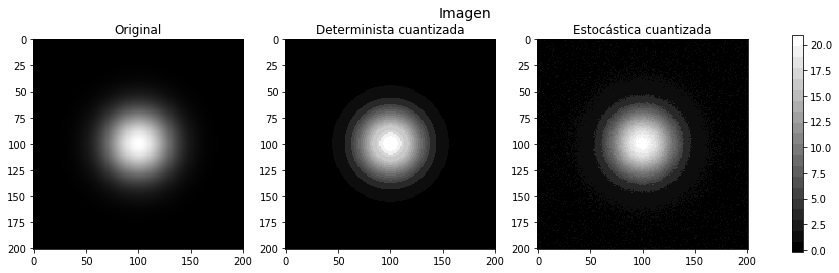

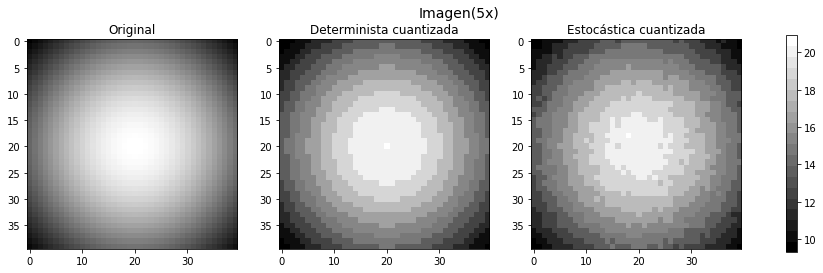

In [11]:
# DOMINIO...
dstep = 0.2
x = np.arange(108, 148 + dstep, dstep)
y = x.copy()
X, Y = np.meshgrid(x, y)

# SEÑALES..
de = 0.2
Z0 = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128)  # Determinista...
Z1 = Z0 + np.random.normal(0, de, X.shape)                # Estocástica...
 
# CUANTIZACIÓN Y GRÁFICADO..  
# Función de cuantización...
n = 20
def cuant(z, n): 
    zstep =  (np.max(z)-np.min(z))/n
    hzstep = zstep/2
    z_c = np.floor((z - np.min(z)) / zstep)*zstep + np.min(z) + hzstep 
    return z_c

# Parámetros para figura..
zoom = [1, 5]
tit = ['Imagen', 'Imagen({}x)'.format(zoom[1])]
subtit = ['Original', 'Determinista cuantizada', 'Estocástica cuantizada']
cmap = mpl.cm.get_cmap('gray',n)

# Grafico..
for t, zm in zip(tit, zoom): 
    fig, ax = plt.subplots(1, 3, figsize=(16,4))
    fig.suptitle(t, fontsize=14);
    i = (zm - 1) / (zm * 2)
    idx = np.arange(int(i*X.shape[0]), int((i + 1/zm)*X.shape[0])) 
    for z, axx, st in zip([Z0, Z0, Z1], ax, subtit):
        if axx == ax[0]:
            z_c = z
            cmap = mpl.cm.get_cmap('gray')
        else:
            z_c = cuant(z, n)                  # cuantización(en plots de cols 2y3)   
            cmap = mpl.cm.get_cmap('gray', n)       
        cb = axx.imshow(z_c[np.ix_(idx, idx)], cmap=cmap)
        axx.set_title(st, fontsize=12)
    fig.colorbar(cb, ax=ax);

***Puede verse el efecto de falsos contornos que produce la cuantización sobre una señal determinista, y cómo es mucho menos drástico en caso de una señal con ruido.<br>
Eso mismo puede eivdenciarse mostrando el error que la cuantización introduce en cada una de las señales...***

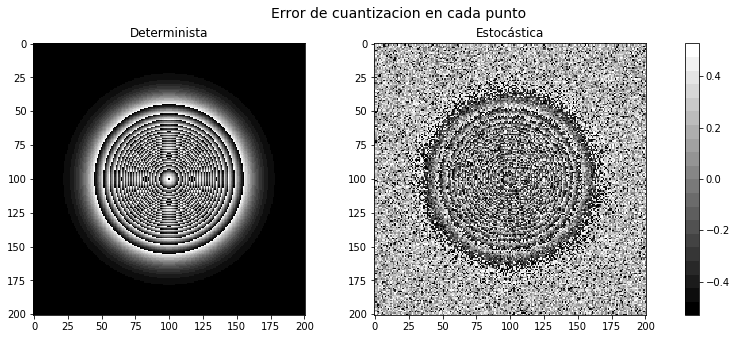

In [12]:
# Parámetros..
subtit = ['Determinista', 'Estocástica']

# Grafico..
fig, ax = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle('Error de cuantizacion en cada punto', fontsize=14);
for z, axx, st in zip([Z0, Z1], ax, subtit):
    z_c = cuant(z, n)     # cuantización   
    z_e = z - z_c          # error por cuantización
    cb = axx.imshow(z_e, cmap=cmap)
    axx.set_title(st, fontsize=12)
fig.colorbar(cb, ax=ax);

***Pasando al inciso a), que trataba de promediar estocásticas...<br>
Para comparar los efectos, grafico una señal que fue cuantizada y luego promediada, y la comparo con una que es promediada y luego cuantizada...***

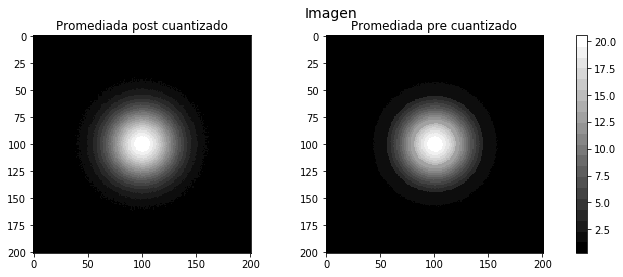

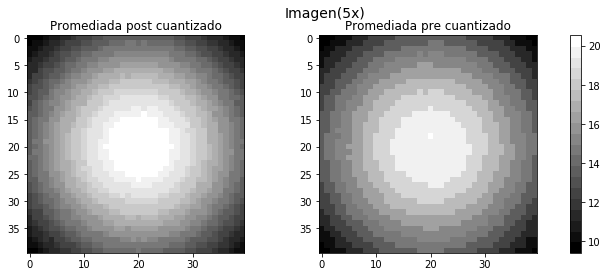

In [13]:
# Núm señales a promediar..
N = 20  

# Estocástica cuantizada y luego promediada..
Z1 =  np.zeros_like(X)
for i in range(N):
    z = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128) + np.random.normal(0, de, X.shape) # cuantización y promediado
    Z1 += (1/N)*cuant(z,n)

# Estocástica promediada previo a cuantización        
Z2 = np.zeros_like(X)
for i in range(N):
    Z2 += (1/N)*(20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128) + np.random.normal(0, de, X.shape))
Z2 = cuant(Z2, n)

# Parámetros para figura..
zoom = [1, 5]
tit = ['Imagen', 'Imagen({}x)'.format(zoom[1])]
subtit = ['Promediada post cuantizado', 'Promediada pre cuantizado']

# Grafico..
for t, zm in zip(tit, zoom): 
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle(t, fontsize=14);
    i = (zm - 1) / (zm * 2)
    idx = np.arange(int(i*X.shape[0]), int((i + 1/zm)*X.shape[0])) 
    for z, axx, st in zip([Z1, Z2], ax, subtit):          
        cb = axx.imshow(z[np.ix_(idx, idx)], cmap=cmap)
        axx.set_title(st, fontsize=12)
    fig.colorbar(cb, ax=ax);

***Se observa que promediando señales estocásticas se recupera parte del efecto, pero es mucho más suave si se promedia luego de cuantizar. Es lógico, porque promediando antes de cuantizar, dado el ruido de media 0, estoy tendiendo a recuperar la señal determinista para luego cuantizarla, que es lo que ya vimos que genera los contornos más abruptos.***

***
***
# 2.1 Actividad 4

***
>***Lee las siguientes imágenes, y para cada una indicá:<br>
-) el tamaño en cantidad de pixeles.<br>
-) la profundidad (en bits).<br>
-) el tipo de dato (uint8, double, uint16, etc).<br>
-) el tipo de color: truecolor, etc.<br>
Y ya que estás, probá de visualizarlas.***
***

In [ ]:
# EJECUTAR ESTA CELDA SOLO SI SE VA A CORRER EN COLAB...
!git clone https://github.com/tvillani22/PSeI.git
import os
os.chdir('PSeI/')

***Usando la librería Pillow y de acuerdo a [esta nomenclatura de modos](https://pillow.readthedocs.io/en/latest/handbook/concepts.html#modes)...***


ARCHIVO: ancla.jpg 
------------------------------
Tamaño en píxeles: Ancho=267; Alto=169; Total=45123
Tipo de color:  Truecolor
Profundidad de bits:  24
Tipo de dato:  uint8

ARCHIVO: mamo.bmp 
------------------------------
Tamaño en píxeles: Ancho=389; Alto=459; Total=178551
Tipo de color:  Escala de grises
Profundidad de bits:  8
Tipo de dato:  uint8

ARCHIVO: Abdomen1.tif 
------------------------------
Tamaño en píxeles: Ancho=1680; Alto=1596; Total=2681280
Tipo de color:  Escala de grises
Profundidad de bits:  8
Tipo de dato:  uint8


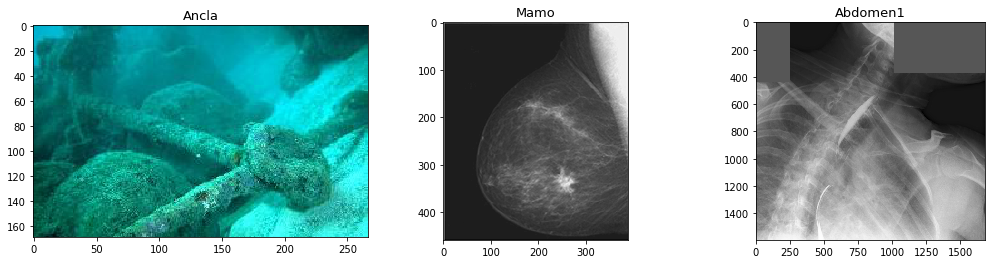

In [10]:
# Con Pillow...
import PIL.Image

def ct_bd(modo):
    dic = {'L': ['Escala de grises', 8], 'RGB': ['Truecolor', 24], 'RGBA': ['Deepcolor', 32]}
    return dic.get(modo, 'Modo no reconocido')  

files = ['ancla.jpg',  'mamo.bmp', 'Abdomen1.tif']
fig, ax = plt.subplots(1, 3, figsize=(18,4), gridspec_kw={'wspace':0})

for file, axx in zip(files, ax):
    print('\nARCHIVO:', file, '\n' + 30*'-')
    img = PIL.Image.open('Data/' + file)
    print('Tamaño en píxeles: Ancho={}; Alto={}; Total={}'
          .format(img.width, img.height, img.width*img.height))
    print('Tipo de color: ', ct_bd(img.mode)[0])
    print('Profundidad de bits: ', ct_bd(img.mode)[1])
    print('Tipo de dato: ', np.array(img).dtype)
    axx.imshow(img, cmap='gray')
    axx.set_title(file.split('.')[0].capitalize())

***
***
# 2.7 Actividad 5-A

>***Generar esta imagen, mostrarla junto a su perfil.<br>
Generar y mostrar su espectro de magnitud.<br>
Repetir con un seno en otra dirección.***

***Genero la señal y la muestro con su perfil...***

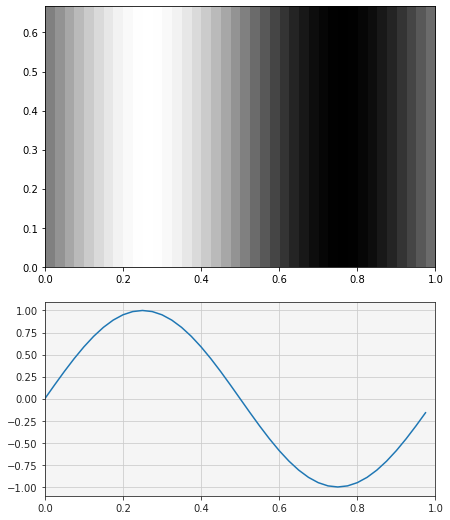

In [13]:
# Parámetros de la señal..
f = 1           # frec
T = 1/f         # período
w = 2*np.pi*f   # frec angular
Ttot = T        # grafico un período

# Parámetros del muestreo..
fm = 40
Tm = 1/fm

# Señal..
x = np.arange(0, Ttot, Tm)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.sin(w*X)

# Grafico..
grid = plt.GridSpec(3, 1, wspace=0, hspace=-0.1)
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(grid[0:2,0])
ax.imshow(Z, cmap='gray', extent=[0, Ttot, 0, Ttot*2/3])
with sns.axes_style('ticks', style):
    ax = fig.add_subplot(grid[2,0])
    ax.plot(x, Z[0,:])
    ax.set_xlim(0, Ttot);

***Transformo al dominio frecuencial...***

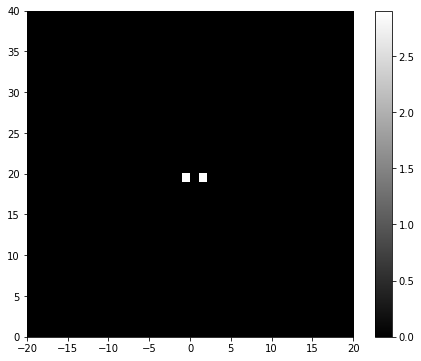

In [14]:
# Defino función que aplica la FFT, el shift para centrar, calcula el módulo de F(w) y muestra usando escala log..
def mi_fft(Z, fm, output=True):
    # Paso a dom frecuencias..
    F = scipy.fft.fft2(Z)
    F = scipy.fft.fftshift(F)
    M = abs(F)
    if output:
        # Grafico..
        fig, ax = plt.subplots(figsize=(8,6))
        cb = ax.imshow(np.log10(M+1), cmap='gray', extent=[-fm*0.5, fm*0.5, 0, fm])
        fig.colorbar(cb, ax=ax)
    return M

M = mi_fft(Z, fm);

***
***Como la señal varía en una sola dirección acá puedo plotear el módulo también en 2D...***

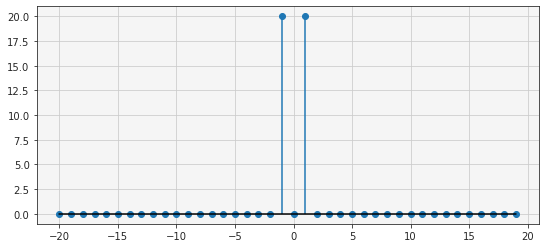

In [15]:
# En x, (que es la única que varía)...
F = scipy.fft.fft(Z[0,:])
M = scipy.fft.fftshift(F)
M = abs(M).round(4)
eje_f = (x/Ttot-0.5)*fm
with sns.axes_style('ticks', style):
    fig, ax = plt.subplots(figsize=(9,4))
    ax.stem(eje_f, M, basefmt='k', use_line_collection=True);

***Veo cuáles son esas frecuencias máximas...***

In [16]:
print('Frecuencias máximas = \n', eje_f[np.argwhere(M == np.amax(M))])

Frecuencias máximas = 
 [[-1.]
 [ 1.]]


***
***En otra dirección...***

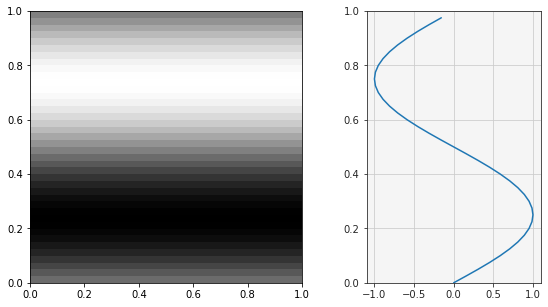

In [17]:
# Señal..
Z = np.sin(w*Y)

# Grafico..
grid = plt.GridSpec(1, 3, wspace=0.1, hspace=0)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(grid[0, 0:2])
ax.imshow(Z, cmap='gray', extent=[0, Ttot, 0, Ttot])
with sns.axes_style('ticks', style):
    ax = fig.add_subplot(grid[0,2])
    ax.plot(Z[:,0],y)
    ax.set_ylim(0, Ttot);

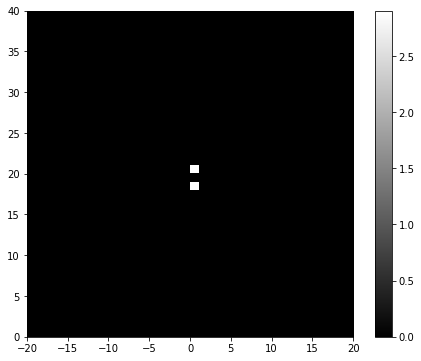

In [18]:
# Paso a frecuencia y grafico..
M = mi_fft(Z, fm);

In [19]:
print('Frecuencias máximas = \n', eje_f[np.argwhere(M == np.amax(M))])

Frecuencias máximas = 
 [[-1.  0.]
 [ 1.  0.]]


***
***
# 2.7 Actividad 5-B

>***Generar esta imagen, mostrarla junto a su perfil.<br>
Generar y mostrar su espectro de magnitud.<br>
Verificá si se cumple el principio de superposición F(f1+f2) = F(f1) + F(f2)***

***Genero la señal que resuta de la sumatoria de esas dos, y la muestro con su perfil...***

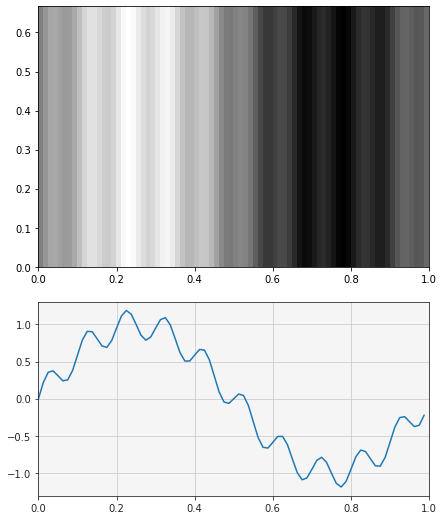

In [41]:
# Parámetros de las señales..
f = np.array([1, 10])  # frec
T = 1/f                # período
w = 2*np.pi*f          # frec angular
Ttot = T.max()         # grafico un período de la señal de menor frecuencia

# Parámetros del muestreo..
fm = 80
Tm = 1/fm

# Señal..
x = np.arange(0, Ttot, Tm)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.sin(w[0]*X) + np.sin(w[1]*X)/5

# Grafico..
grid = plt.GridSpec(3, 1, wspace=0, hspace=-0.1)
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(grid[0:2,0])
ax.imshow(Z, cmap='gray', extent=[0, Ttot, 0, Ttot*2/3])
with sns.axes_style('ticks', style):
    ax = fig.add_subplot(grid[2,0])
    ax.plot(x, Z[0,:])
    ax.set_xlim(0, Ttot);

***Paso a dominio de la frecuencia y muestro como imagen...***

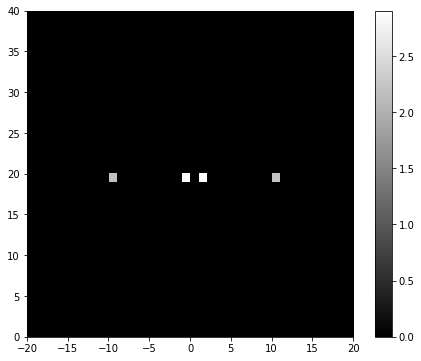

In [38]:
# Usando la función definida antes..
M = mi_fft(Z, fm);

In [39]:
eje_f = (x/Ttot-0.5)*fm
print('Frecuencias máximas = \n', eje_f[np.argwhere(M >0.1)])

Frecuencias máximas = 
 [[  0. -10.]
 [  0.  -1.]
 [  0.   1.]
 [  0.  10.]]


***Verifico que se cumpla el principio de superposición (linealidad)...***

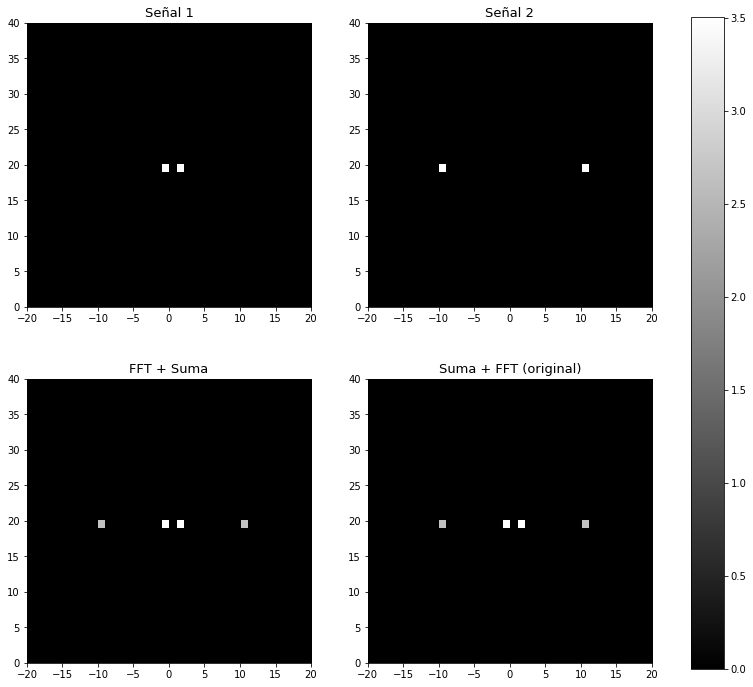

In [40]:
# Señales..
Z1 = np.sin(w[0]*X)
Z2 = np.sin(w[1]*X)/5

# Transformo..
M1 = mi_fft(Z1, fm, output=False)
M2 = mi_fft(Z2, fm, output=False)

# Grafico..
fig, ax = plt.subplots(2, 2, figsize=(14,12))
tit = ['Señal 1', 'Señal 2', 'FFT + Suma', 'Suma + FFT (original)' ]
for axx, m, t in zip(ax.ravel(), [M1,M2,M1+M2,M], tit):
    axx.imshow(np.log10(m+1), cmap='gray', extent=[-fm*0.5, fm*0.5, 0, fm])
    axx.set_title(t)
fig.colorbar(cb, ax=ax[:,:]);

In [36]:
# Verifico si las matriz resultante de la suma es igual a la obtenida antes..
print('Las FFT resultantes son iguales:', np.allclose(M, M1+M2))

Las FFT resultantes son iguales: True


***
***
# 2.7 Actividad 5-C

***
***
***